# Grahams Scan

In [ ]:
from functools import cmp_to_key
import time
import matplotlib.pyplot as plt
import numpy as np

class coordinate_points:
    def __init__(self,a,b):
        self.a = a
        self.b = b

def Orient(x,y,z):
    value = (y.b-x.b)*(z.a-y.a) - (y.a-x.a)*(z.b-y.b)
    if value < 0:
        return 2 #Here the line rotates aniclockwise.
    elif value == 0:
        return 0 # This is collinear
    else:
        return 1 #This is if line rotates clockwise

# This is a global point to be used as reference
ref_p0 = coordinate_points(0, 0)

# function to find next to last stop
def TopNext(stack):
    return stack[-2]

# Function to return distance squared
def SquaredDist(point1, point2):
    return ((point1.a - point2.a) **2 + (point1.b - point2.b) **2)

# This function compares two points distance
def distance_compare(point1, point2):

    _orient = Orient(ref_p0, point1, point2)
    if _orient == 0:
        if SquaredDist(ref_p0, point2) >= SquaredDist(ref_p0, point1):
            return -1
        else:
            return 1
    else:
        if _orient == 2:
            return -1
        else:
            return 1

def GrahamsScan(coordinates, _length):

    # Finding the lowest point
    startTime = time.time()
    min_b = coordinates[0].b
    _min = 0
    for k in range(1, _length):
        b = coordinates[k].b
        if ((b < min_b) or (min_b == b and coordinates[k].a < coordinates[_min].a)):
            min_b = coordinates[k].b
            _min = k

    # Placing the last point at first position
    coordinates[0], coordinates[_min] = coordinates[_min], coordinates[0]

    # Sorting the points after comparing their polar angles
    ref_p0 = coordinates[0]
    coordinates = sorted(coordinates, key=cmp_to_key(distance_compare))

    size_of_modified_array = 1 # intialization of modified array size
    for k in range(1, _length):
        #checking the orientation and removing the points with same angle with reference to point 0
        while ((k < _length - 1) and (Orient(ref_p0, coordinates[k], coordinates[k + 1]) == 0)):
            k += 1
        coordinates[size_of_modified_array] = coordinates[k]
        size_of_modified_array += 1
        

    # If there are less than 3 points in modified array convex hull is not possible
    if size_of_modified_array < 3:
        return []

    #Pushing 3 points in empty stack
    _stack = []
    _stack.append(coordinates[0])
    _stack.append(coordinates[1])
    _stack.append(coordinates[2])

    #Scanning rest points leaving the above 3
    for k in range(3, size_of_modified_array):
        #Checking the convexity of points if two point is not convex then discard the last point
        while ((len(_stack) > 1) and (Orient(_stack[-2], _stack[-1], coordinates[k]) != 2)):
            _stack.pop()
        _stack.append(coordinates[k])
        
    TotalTime = time.time() - startTime
    print("Data Set Size =",_length,"Time Taken =",TotalTime)
    
    return TotalTime

In [544]:
def start_grahams_scan(size_of_dataset):
    _time = []
    for size in size_of_dataset:
        _points = np.random.randint(20,size=(size,2)) #Randomly Generating integers for grahams scan
        #Now we will create list of point object taking the above randomized point
        input_list = list(map(tuple,_points))
        coordinates = [coordinate_points(a, b) for (a, b) in input_list] #Here the flat function converts numpy array to 1d here 1::2 means starting from index 1 in steps of 2.
        #Calling the function to get coordinates after graham scan.
        _time.append(GrahamsScan(coordinates,len(coordinates)))
    plt.plot(size_of_dataset,_time)
    plt.show()

Data Set Size = 10 Time Taken = 0.0

Data Set Size = 100 Time Taken = 0.001996278762817383

Data Set Size = 1000 Time Taken = 0.04634213447570801

Data Set Size = 10000 Time Taken = 0.2149052619934082

Data Set Size = 100000 Time Taken = 2.5371272563934326

Data Set Size = 1000000 Time Taken = 24.03463053703308

Data Set Size = 10000000 Time Taken = 272.5233745574951


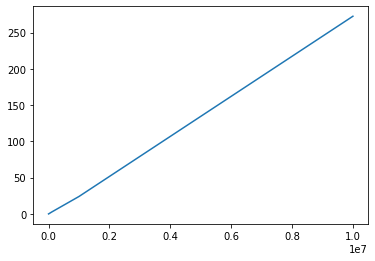

In [481]:
start_grahams_scan([10,100,1000,10000,100000,1000000,10000000])

Data Set Size = 10 Time Taken = 0.003391265869140625

Data Set Size = 100 Time Taken = 0.003002643585205078

Data Set Size = 1000 Time Taken = 0.01752924919128418

Data Set Size = 10000 Time Taken = 0.21298480033874512

Data Set Size = 100000 Time Taken = 2.310938835144043

Data Set Size = 1000000 Time Taken = 24.64509344100952

Data Set Size = 10000000 Time Taken = 306.3037574291229


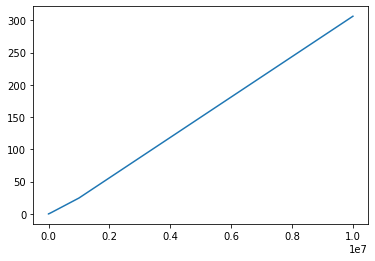

In [482]:
start_grahams_scan([10,100,1000,10000,100000,1000000,10000000])

Data Set Size = 10 Time Taken = 0.002993345260620117

Data Set Size = 100 Time Taken = 0.0010066032409667969

Data Set Size = 1000 Time Taken = 0.014999866485595703

Data Set Size = 10000 Time Taken = 0.20911216735839844

Data Set Size = 100000 Time Taken = 2.4298465251922607

Data Set Size = 1000000 Time Taken = 24.658456563949585

Data Set Size = 10000000 Time Taken = 262.1173400878906


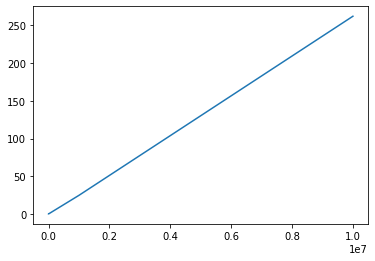

In [485]:
start_grahams_scan([10,100,1000,10000,100000,1000000,10000000])

In [ ]:
start_grahams_scan([10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Jarvis March

In [545]:
def JarvisMarch(coordinates, _length):
    startTime = time.time()
    if _length < 3:
        return []
  
    #Scanning the left most point
    _minimum = 0
    for k in range(1,_length):
        if coordinates[k].a < coordinates[_minimum].a:
            _minimum = k
        elif coordinates[k].a == coordinates[_minimum].a:
            if coordinates[k].b > coordinates[_minimum].b:
                _minimum = k
    
  
    convex_hull = []
    #Starting from the left most point moving counterclockwise to reach starting point.
    g = _minimum
    m = 0
    while(True):
        convex_hull.append(g)
        # Searching a point m which is counterclockwise for all the points k.
        m = (g + 1)%_length
  
        for k in range(_length):
            #Checking orientation here to find the most counterclowise k.
            if(Orient(coordinates[g], coordinates[k], coordinates[m]) == 2):
                m = k
  
        # Here we set g to m because g will be referenced now for next iteration
        g = m
  
        # Our goal is reached when we find first point again
        if(g == _minimum):
            break
                   
                   
    TotalTime = time.time() - startTime
    print("Data Set Size =",_length,"Time Taken =",TotalTime)
    
    return TotalTime
    
  


In [546]:
def start_jarvis_march(size_of_dataset):
    _time = []
    for size in size_of_dataset:
        _points = np.random.randint(40,size=(size,2)) #Randomly Generating integers for jarvis march
        #Now we will create list of point object taking the above randomized point
        input_list = list(map(tuple,_points))
        coordinates = [coordinate_points(a, b) for (a, b) in input_list]
        #Calling the function to get coordinates after jarvis's march.
        _time.append(JarvisMarch(coordinates,len(coordinates)))
    plt.plot(size_of_dataset,_time)
    plt.show()

Data Set Size = 10 Time Taken = 0.000133514404296875
Data Set Size = 100 Time Taken = 0.0016934871673583984
Data Set Size = 1000 Time Taken = 0.025521278381347656
Data Set Size = 10000 Time Taken = 0.29172372817993164
Data Set Size = 100000 Time Taken = 3.003873586654663
Data Set Size = 1000000 Time Taken = 23.810930252075195
Data Set Size = 1000000 Time Taken = 19.89277219772339


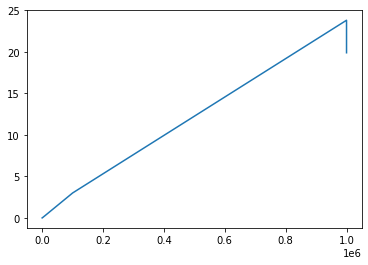

In [10]:
start_jarvis_march([10,100,1000,10000,100000,1000000,1000000])

Data Set Size = 1000000 Time Taken = 19.329484462738037
Data Set Size = 10000000 Time Taken = 160.30113554000854


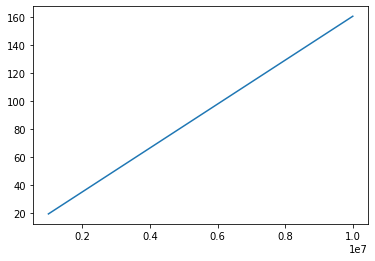

In [12]:
start_jarvis_march([1000000,10000000])

# Comaprison Test on the same dataset

In [547]:
def comapare_algorithms(size_of_dataset):
    _time_graham = []
    _time_jarvis = []
    for size in size_of_dataset:
        _points = np.random.randint(40,size=(size,2)) #Randomly Generating integers
        #Now we will create list of point object taking the above randomized point
        input_list = list(map(tuple,_points))
        coordinates = [coordinate_points(a, b) for (a, b) in input_list]
        #Calling the function to get coordinates after jarvis's march.
        print("Jarvis March")
        _time_jarvis.append(JarvisMarch(coordinates,len(coordinates)))
        print("Grahams Scan")
        _time_graham.append(GrahamsScan(coordinates,len(coordinates)))
    plt.plot(size_of_dataset,_time_jarvis, label = "jarvis march")
    plt.plot(size_of_dataset,_time_graham, label = "grahams scan")
    plt.legend()
    plt.show()

Jarvis March
Data Set Size = 100 Time Taken = 0.0029997825622558594
Grahams Scan
Data Set Size = 100 Time Taken = 0.0020024776458740234
Jarvis March
Data Set Size = 1000 Time Taken = 0.018537044525146484
Grahams Scan
Data Set Size = 1000 Time Taken = 0.018021106719970703
Jarvis March
Data Set Size = 10000 Time Taken = 0.20769238471984863
Grahams Scan
Data Set Size = 10000 Time Taken = 0.4118809700012207
Jarvis March
Data Set Size = 100000 Time Taken = 1.3497893810272217
Grahams Scan
Data Set Size = 100000 Time Taken = 21.943246841430664


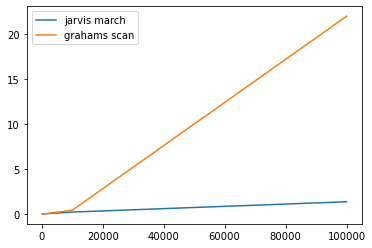

In [548]:
comapare_algorithms([100,1000, 10000, 100000])

Jarvis March
Data Set Size = 100 Time Taken = 0.0009953975677490234
Grahams Scan
Data Set Size = 100 Time Taken = 0.0
Jarvis March
Data Set Size = 1000 Time Taken = 0.022259235382080078
Grahams Scan
Data Set Size = 1000 Time Taken = 0.015474557876586914
Jarvis March
Data Set Size = 10000 Time Taken = 0.19605278968811035
Grahams Scan
Data Set Size = 10000 Time Taken = 0.4085557460784912
Jarvis March
Data Set Size = 100000 Time Taken = 1.3477058410644531
Grahams Scan
Data Set Size = 100000 Time Taken = 23.604417085647583


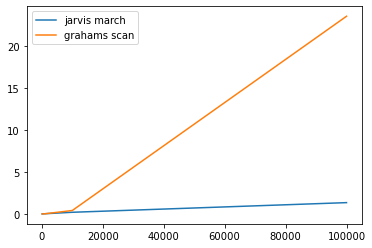

In [549]:
comapare_algorithms([100,1000, 10000, 100000])

Jarvis March
Data Set Size = 100 Time Taken = 0.0010023117065429688
Grahams Scan
Data Set Size = 100 Time Taken = 0.0009989738464355469
Jarvis March
Data Set Size = 1000 Time Taken = 0.0164492130279541
Grahams Scan
Data Set Size = 1000 Time Taken = 0.017029285430908203
Jarvis March
Data Set Size = 10000 Time Taken = 0.16208744049072266
Grahams Scan
Data Set Size = 10000 Time Taken = 0.39534568786621094
Jarvis March
Data Set Size = 100000 Time Taken = 1.5010044574737549
Grahams Scan
Data Set Size = 100000 Time Taken = 21.656955003738403


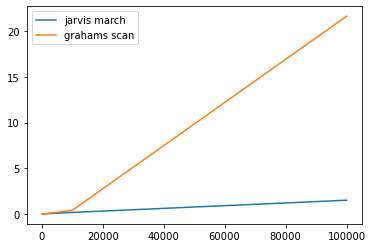

In [555]:
comapare_algorithms([100,1000, 10000, 100000])

Jarvis March
Data Set Size = 100 Time Taken = 0.0010030269622802734
Grahams Scan
Data Set Size = 100 Time Taken = 0.0010035037994384766
Jarvis March
Data Set Size = 1000 Time Taken = 0.016545772552490234
Grahams Scan
Data Set Size = 1000 Time Taken = 0.017023086547851562
Jarvis March
Data Set Size = 10000 Time Taken = 0.18813443183898926
Grahams Scan
Data Set Size = 10000 Time Taken = 0.4152247905731201
Jarvis March
Data Set Size = 100000 Time Taken = 2.2523584365844727
Grahams Scan
Data Set Size = 100000 Time Taken = 23.20590853691101


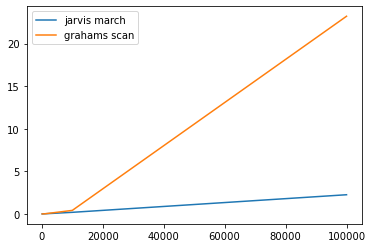

In [554]:
comapare_algorithms([100,1000, 10000, 100000])

Jarvis March
Data Set Size = 100 Time Taken = 0.0019881725311279297
Grahams Scan
Data Set Size = 100 Time Taken = 0.0010111331939697266
Jarvis March
Data Set Size = 1000 Time Taken = 0.014007091522216797
Grahams Scan
Data Set Size = 1000 Time Taken = 0.0160064697265625
Jarvis March
Data Set Size = 10000 Time Taken = 0.1550755500793457
Grahams Scan
Data Set Size = 10000 Time Taken = 0.4038684368133545
Jarvis March
Data Set Size = 100000 Time Taken = 1.3801705837249756
Grahams Scan
Data Set Size = 100000 Time Taken = 22.2816059589386


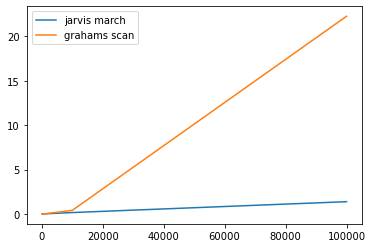

In [552]:
comapare_algorithms([100,1000, 10000, 100000])